In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sys

### Importando dados de limpezas

In [2]:
df_limpezas = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/V_LIMPEZAS_EXECUTADAS_202510141706.csv')  
print(df_limpezas.info())
print(df_limpezas.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MUNICIPIO   249 non-null    int64 
 1   DATA_EXECUCAO  249 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB
None
   CD_MUNICIPIO            DATA_EXECUCAO
0           571  2025-07-01 14:46:05.000
1           571  2024-11-06 09:09:50.000
2           571  2024-11-05 11:21:39.000
3           571  2024-12-11 14:56:06.000
4           571  2024-11-27 09:28:24.000


### Importando dados de municípios

In [3]:
df_municipios = pd.read_csv('/home/breno/projects/sobre-rodas/data/raw/ORGAO_EMPRESA_202510141615.csv')
df_municipios = df_municipios.rename(columns={'CD_ORGAO_EMPRESA': 'CD_MUNICIPIO', 'NM_ORGAO_EMPRESA': 'NM_MUNICIPIO'})
print(df_municipios.info())
print(df_municipios.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CD_MUNICIPIO  473 non-null    int64 
 1   NM_MUNICIPIO  473 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.5+ KB
None
   CD_MUNICIPIO        NM_MUNICIPIO
0             1              MATRIZ
1             2              ITAJAÍ
2             3  BALNEÁRIO CAMBORIU
3             4       FLORIANÓPOLIS
4             5             TUBARÃO


### Concatenando dataframes de limpezas e municípios

In [4]:
df_merged = pd.merge(
    df_limpezas,
    df_municipios,
    on='CD_MUNICIPIO',  # Coluna comum para o join
    how='left'         # Usa todas as linhas de df_vistoria e adiciona as colunas de df_municipios
)
df_limpezas = df_merged
print(df_limpezas.info())
print(df_limpezas.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MUNICIPIO   249 non-null    int64 
 1   DATA_EXECUCAO  249 non-null    object
 2   NM_MUNICIPIO   249 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.0+ KB
None
   CD_MUNICIPIO            DATA_EXECUCAO NM_MUNICIPIO
0           571  2025-07-01 14:46:05.000     DESCANSO
1           571  2024-11-06 09:09:50.000     DESCANSO
2           571  2024-11-05 11:21:39.000     DESCANSO
3           571  2024-12-11 14:56:06.000     DESCANSO
4           571  2024-11-27 09:28:24.000     DESCANSO


### Calculando limpezas realizadas por município

In [14]:
df_num_limpezas_municipio = df_limpezas.groupby('NM_MUNICIPIO').size().reset_index(name='NUMERO_DE_LIMPEZAS')
df_num_limpezas_municipio = df_num_limpezas_municipio.sort_values(
    by='NUMERO_DE_LIMPEZAS',
    ascending=False
)
df_num_limpezas_municipio

,NM_MUNICIPIO,NUMERO_DE_LIMPEZAS
0,DESCANSO,249


### Plotando limpezas realizadas por município

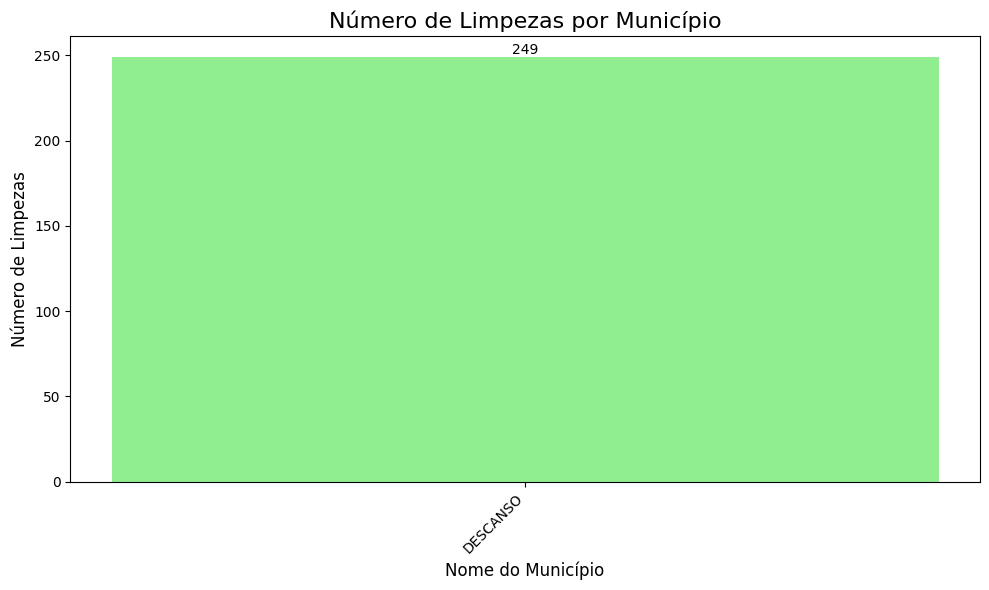

In [15]:
x_col = 'NM_MUNICIPIO'
y_col = 'NUMERO_DE_LIMPEZAS'

plt.figure(figsize=(10, 6)) # Define o tamanho do gráfico

# 1. Cria o gráfico de barras
plt.bar(df_num_limpezas_municipio[x_col], df_num_limpezas_municipio[y_col], color='lightgreen')

# 2. Adiciona título e rótulos
plt.title('Número de Limpezas por Município', fontsize=16)
plt.xlabel('Nome do Município', fontsize=12)
plt.ylabel('Número de Limpezas', fontsize=12)

# 3. Rotaciona os nomes dos municípios no eixo X para melhor visualização (se houver muitos)
plt.xticks(rotation=45, ha='right')

# 4. Adiciona os valores em cima de cada barra (para clareza)
for i, v in enumerate(df_num_limpezas_municipio[y_col]):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# 5. Ajusta o layout para evitar que rótulos sejam cortados
plt.tight_layout()

# 6. Salva o gráfico (será salvo como 'limpezas_por_municipio.png')
plt.savefig('limpezas_por_municipio.png')

### Calculando o número de limpezas por dia (Geral)

In [19]:
df_limpezas['DATA_EXECUCAO'] = pd.to_datetime(df_limpezas['DATA_EXECUCAO'])
df_limpezas_por_dia = (
    df_limpezas.groupby(df_limpezas['DATA_EXECUCAO'].dt.date)
    .size()
    .reset_index(name='QUANTIDADE_DE_LIMPEZAS')
)
df_limpezas_por_dia.columns = ['DATA', 'QUANTIDADE_DE_LIMPEZAS']
df_limpezas_por_dia

,DATA,QUANTIDADE_DE_LIMPEZAS
0,2024-11-05,11
1,2024-11-06,10
2,2024-11-26,9
3,2024-11-27,10
4,2024-12-10,11
5,2024-12-11,14
6,2025-01-15,12
7,2025-01-16,9
8,2025-02-11,13
9,2025-02-12,9


### Plotando o número de limpezas por dia

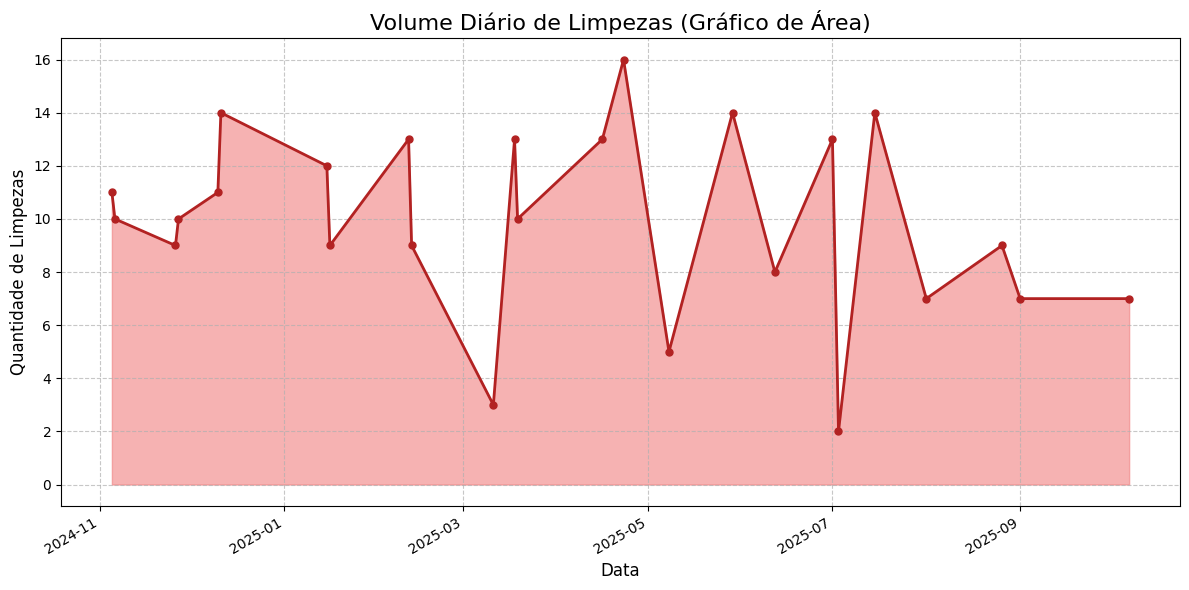

In [20]:
x_col = 'DATA'
y_col = 'QUANTIDADE_DE_LIMPEZAS'

plt.figure(figsize=(12, 6))

# 1. Cria o gráfico de área
plt.fill_between(df_limpezas_por_dia[x_col], df_limpezas_por_dia[y_col], 
                 color='lightcoral',    # Cor da área
                 alpha=0.6              # Transparência
)
# Opcional: Adicionar a linha por cima da área para maior clareza
plt.plot(df_limpezas_por_dia[x_col], df_limpezas_por_dia[y_col], 
         color='firebrick', linewidth=2, marker='o', markersize=5)


# 2. Adiciona título e rótulos
plt.title('Volume Diário de Limpezas (Gráfico de Área)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade de Limpezas', fontsize=12)

# 3. Formata o eixo X para datas
plt.gcf().autofmt_xdate()

# 4. Adiciona grade para facilitar a leitura
plt.grid(True, linestyle='--', alpha=0.7)

# 5. Ajusta o layout
plt.tight_layout()

# 6. Salva
plt.savefig('limpezas_por_dia_area.png')
# plt.show() # Descomente para exibir o gráfico

### Gravando dataframe df_num_limpezas_municipio no banco de dados

In [18]:
DB_USER = "superset"
DB_PASSWORD = "superset"
DB_HOST = "superset.casan.com.br"
DB_PORT = "5432"
DB_NAME = "sobrerodas"
TABLE_NAME = "limpezas"

# --- 2. Criar a Engine de Conexão (SQLAlchemy) ---

DATABASE_URL = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

try:
    engine = create_engine(DATABASE_URL)
    print("Engine de conexão criada com sucesso.")
    
    # --- 3. Gravar o DataFrame na Tabela do PostgreSQL ---
    
    df_num_limpezas_municipio.to_sql(
        name=TABLE_NAME, 
        con=engine, 
        if_exists='replace', # Opções: 'fail', 'replace', 'append'
        index=False          # Não grava o índice do DataFrame como coluna
    )

    print(f"\nDataFrame gravado com sucesso na tabela '{TABLE_NAME}' no banco de dados '{DB_NAME}'.")

except ImportError:
    print("\nERRO: Certifique-se de que os pacotes 'pandas', 'sqlalchemy' e 'psycopg2' estão instalados.")
    print("Execute: pip install pandas sqlalchemy psycopg2")
except Exception as e:
    print(f"\nOCORREU UM ERRO ao tentar conectar ou gravar no banco de dados:")
    print(e)
    # Exibe a linha do erro, se possível
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(f"Linha do erro: {exc_tb.tb_lineno}")
finally:
    # É uma boa prática descartar a engine no final, embora não seja estritamente necessário 
    # se o script for encerrado logo em seguida.
    if 'engine' in locals():
        engine.dispose()

Engine de conexão criada com sucesso.

DataFrame gravado com sucesso na tabela 'limpezas' no banco de dados 'sobrerodas'.


### Gravando o dataframe df_limpezas_por_dia no banco de dados

In [21]:
DB_USER = "superset"
DB_PASSWORD = "superset"
DB_HOST = "superset.casan.com.br"
DB_PORT = "5432"
DB_NAME = "sobrerodas"
TABLE_NAME = "limpezas_dia"

# --- 2. Criar a Engine de Conexão (SQLAlchemy) ---

DATABASE_URL = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

try:
    engine = create_engine(DATABASE_URL)
    print("Engine de conexão criada com sucesso.")
    
    # --- 3. Gravar o DataFrame na Tabela do PostgreSQL ---
    
    df_limpezas_por_dia.to_sql(
        name=TABLE_NAME, 
        con=engine, 
        if_exists='replace', # Opções: 'fail', 'replace', 'append'
        index=False          # Não grava o índice do DataFrame como coluna
    )

    print(f"\nDataFrame gravado com sucesso na tabela '{TABLE_NAME}' no banco de dados '{DB_NAME}'.")

except ImportError:
    print("\nERRO: Certifique-se de que os pacotes 'pandas', 'sqlalchemy' e 'psycopg2' estão instalados.")
    print("Execute: pip install pandas sqlalchemy psycopg2")
except Exception as e:
    print(f"\nOCORREU UM ERRO ao tentar conectar ou gravar no banco de dados:")
    print(e)
    # Exibe a linha do erro, se possível
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(f"Linha do erro: {exc_tb.tb_lineno}")
finally:
    # É uma boa prática descartar a engine no final, embora não seja estritamente necessário 
    # se o script for encerrado logo em seguida.
    if 'engine' in locals():
        engine.dispose()

Engine de conexão criada com sucesso.

DataFrame gravado com sucesso na tabela 'limpezas_dia' no banco de dados 'sobrerodas'.
